In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
pokemon_df = pd.read_csv('pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
pokemon_df= pokemon_df.set_index("#")
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
combats_df = pd.read_csv('combats.csv')
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [6]:
pokemon_df["Type 2"].value_counts(dropna =False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [7]:
pokemon_df["Type 2"].fillna('empty',inplace=True)
pokemon_df["Type 2"].value_counts()

empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [8]:
print(combats_df.dtypes)
print('-' * 30)
print(pokemon_df.dtypes)

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object
------------------------------
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [9]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].astype('category') 
pokemon_df['Type 2'] = pokemon_df['Type 2'].astype('category')
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype('int64')
pokemon_df.dtypes

Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int64
dtype: object

In [10]:
df_type1_one_hot = pd.get_dummies(pokemon_df['Type 1'])
df_type1_one_hot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_type2_one_hot = pd.get_dummies(pokemon_df['Type 2'])
df_type2_one_hot.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [12]:
combine_df_one_hot = df_type1_one_hot.add(df_type2_one_hot, fill_value=0).astype('int64')

pd.options.display.max_columns = 30

pokemon_df = pokemon_df.join(combine_df_one_hot)
pokemon_df.head()  

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,Fire,empty,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [13]:
dict(enumerate(pokemon_df['Type 2'].cat.categories))

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water',
 18: 'empty'}

In [14]:
pokemon_df['Type 2'].cat.codes.head(10)

#
1     13
2     13
3     13
4     13
5     18
6     18
7      7
8      2
9      7
10    18
dtype: int8

In [15]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].cat.codes
pokemon_df['Type 2'] = pokemon_df['Type 2'].cat.codes
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
pokemon_df.drop('Name', axis='columns', inplace=True)
pokemon_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
combats_df['Winner'] = combats_df.apply(lambda x: 0 
                                        if x.Winner == x.First_pokemon else 1, 
                                        axis='columns')
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


In [18]:
data_num = combats_df.shape[0]

indexes = np.random.permutation(data_num)

train_indexes = indexes[:int(data_num *0.6)]
val_indexes = indexes[int(data_num *0.6):int(data_num *0.8)]
test_indexes = indexes[int(data_num *0.8):]

train_data = combats_df.loc[train_indexes]
val_data = combats_df.loc[val_indexes]
test_data = combats_df.loc[test_indexes]

In [19]:
pokemon_df['Type 1'] = pokemon_df['Type 1'] / 19
pokemon_df['Type 2'] = pokemon_df['Type 2'] / 19

In [20]:
mean = pokemon_df.loc[:, 'HP':'Generation'].mean() 
std = pokemon_df.loc[:, 'HP':'Generation'].std()

pokemon_df.loc[:,'HP':'Generation'] = (pokemon_df.loc[:,'HP':'Generation']-mean)/std
pokemon_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.473684,0.684211,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0.473684,0.684211,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.473684,0.684211,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.473684,0.684211,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0.315789,0.947368,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
x_train_index = np.array(train_data.drop('Winner', axis='columns'))
x_val_index = np.array(val_data.drop('Winner', axis='columns'))
x_test_index = np.array(test_data.drop('Winner', axis='columns'))
print(x_train_index)

[[353  20]
 [ 43 233]
 [589 224]
 ...
 [636 600]
 [688 403]
 [ 89 603]]


In [22]:
y_train = np.array(train_data['Winner'])
y_val = np.array(val_data['Winner'])
y_test = np.array(test_data['Winner'])

In [23]:
pokemon_data_normal = np.array(pokemon_df.loc[:, :'Legendary'])
print(pokemon_data_normal.shape)

x_train_normal = pokemon_data_normal[x_train_index -1].reshape((-1, 20))
x_val_normal = pokemon_data_normal[x_val_index -1].reshape((-1, 20))
x_test_normal = pokemon_data_normal[x_test_index -1].reshape((-1, 20))
print(x_train_normal.shape)

(800, 10)
(30000, 20)


In [24]:
pokemon_data_one_hot = np.array(pokemon_df.loc[:, 'HP':])
print(pokemon_data_one_hot.shape)

x_train_one_hot = pokemon_data_one_hot[x_train_index -1].reshape((-1, 54))
x_val_one_hot = pokemon_data_one_hot[x_val_index -1].reshape((-1, 54))
x_test_one_hot = pokemon_data_one_hot[x_test_index -1].reshape((-1, 54))
print(x_train_one_hot.shape)

(800, 27)
(30000, 54)


In [25]:
inputs = keras.Input(shape=(20, )) 

x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(1)(x)

model_1 = keras.Model(inputs, outputs, name='model-1')
model_1.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0   

In [26]:
model_dir = 'lab3-logs/models'
os.makedirs(model_dir)

In [27]:
log_dir = os.path.join('lab3-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5', 
                                             monitor='val_binary_accuracy', 
                                             save_best_only=True, 
                                             mode='max')

In [28]:
model_1.compile(keras.optimizers.Adam(),
               loss=keras.losses.BinaryCrossentropy(from_logits=True), 
               metrics=[keras.metrics.BinaryAccuracy()])

In [29]:
history_1 = model_1.fit(x_train_normal, y_train, 
                batch_size=64 ,
                epochs=200, 
                validation_data=(x_val_normal, y_val),
                callbacks=[model_cbk, model_mckp])

Epoch 1/200
469/469 [==============================] - 5s 5ms/step - loss: 0.4427 - binary_accuracy: 0.7983 - val_loss: 0.3052 - val_binary_accuracy: 0.9089
Epoch 2/200
469/469 [==============================] - 2s 5ms/step - loss: 0.3249 - binary_accuracy: 0.8904 - val_loss: 0.2423 - val_binary_accuracy: 0.9254
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2767 - binary_accuracy: 0.9084 - val_loss: 0.2135 - val_binary_accuracy: 0.9287
Epoch 4/200
469/469 [==============================] - 2s 5ms/step - loss: 0.2473 - binary_accuracy: 0.9173 - val_loss: 0.1942 - val_binary_accuracy: 0.9338
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2284 - binary_accuracy: 0.9224 - val_loss: 0.1901 - val_binary_accuracy: 0.9323
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2158 - binary_accuracy: 0.9257 - val_loss: 0.1861 - val_binary_accuracy: 0.9360
Epoch 7/200
469/469 [==============================] - 2s 

Epoch 53/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1677 - binary_accuracy: 0.9449 - val_loss: 0.1617 - val_binary_accuracy: 0.9489
Epoch 54/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1680 - binary_accuracy: 0.9423 - val_loss: 0.1716 - val_binary_accuracy: 0.9434
Epoch 55/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1683 - binary_accuracy: 0.9434 - val_loss: 0.1648 - val_binary_accuracy: 0.9454
Epoch 56/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1640 - binary_accuracy: 0.9446 - val_loss: 0.1638 - val_binary_accuracy: 0.9446
Epoch 57/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1663 - binary_accuracy: 0.9435 - val_loss: 0.1684 - val_binary_accuracy: 0.9448
Epoch 58/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1683 - binary_accuracy: 0.9446 - val_loss: 0.1628 - val_binary_accuracy: 0.9456
Epoch 59/200
469/469 [==============================

Epoch 105/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1589 - binary_accuracy: 0.9462 - val_loss: 0.1578 - val_binary_accuracy: 0.9506
Epoch 106/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1550 - binary_accuracy: 0.9469 - val_loss: 0.1637 - val_binary_accuracy: 0.9453
Epoch 107/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1546 - binary_accuracy: 0.9462 - val_loss: 0.1642 - val_binary_accuracy: 0.9425
Epoch 108/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1588 - binary_accuracy: 0.9450 - val_loss: 0.1615 - val_binary_accuracy: 0.9468
Epoch 109/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1591 - binary_accuracy: 0.9465 - val_loss: 0.1608 - val_binary_accuracy: 0.9450
Epoch 110/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1579 - binary_accuracy: 0.9459 - val_loss: 0.1594 - val_binary_accuracy: 0.9468
Epoch 111/200
469/469 [=======================

469/469 [==============================] - 2s 4ms/step - loss: 0.1539 - binary_accuracy: 0.9470 - val_loss: 0.1603 - val_binary_accuracy: 0.9464
Epoch 157/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1528 - binary_accuracy: 0.9477 - val_loss: 0.1630 - val_binary_accuracy: 0.9471
Epoch 158/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1512 - binary_accuracy: 0.9487 - val_loss: 0.1594 - val_binary_accuracy: 0.9483
Epoch 159/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1510 - binary_accuracy: 0.9481 - val_loss: 0.1646 - val_binary_accuracy: 0.9451
Epoch 160/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1532 - binary_accuracy: 0.9473 - val_loss: 0.1624 - val_binary_accuracy: 0.9467
Epoch 161/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1512 - binary_accuracy: 0.9478 - val_loss: 0.1643 - val_binary_accuracy: 0.9458
Epoch 162/200
469/469 [==============================] - 2s 

In [30]:
inputs = keras.Input(shape=(54, ))

x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(1)(x)

model_2 = keras.Model(inputs, outputs, name='model-2')
model_2.summary()  # 顯示網路架構

Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                3520      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0   

In [31]:
log_dir = os.path.join('lab3-logs', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5', 
                                         monitor='val_binary_accuracy', 
                                         save_best_only=True, 
                                         mode='max')

In [32]:
model_2.compile(keras.optimizers.Adam(),  
               loss=keras.losses.BinaryCrossentropy(from_logits=True), 
               metrics=[keras.metrics.BinaryAccuracy()])

In [33]:
history_2 = model_2.fit(x_train_one_hot, y_train, 
                    batch_size=64 ,
                    epochs=200, 
                    validation_data=(x_val_one_hot, y_val), 
                    callbacks=[model_cbk, model_mckp])

Epoch 1/200
469/469 [==============================] - 3s 4ms/step - loss: 0.4534 - binary_accuracy: 0.7752 - val_loss: 0.3142 - val_binary_accuracy: 0.8856
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3385 - binary_accuracy: 0.8814 - val_loss: 0.2471 - val_binary_accuracy: 0.9145
Epoch 3/200
469/469 [==============================] - 2s 5ms/step - loss: 0.2828 - binary_accuracy: 0.8997 - val_loss: 0.2106 - val_binary_accuracy: 0.9194
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2551 - binary_accuracy: 0.9086 - val_loss: 0.1933 - val_binary_accuracy: 0.9312
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2299 - binary_accuracy: 0.9154 - val_loss: 0.1793 - val_binary_accuracy: 0.9315
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 0.2164 - binary_accuracy: 0.9185 - val_loss: 0.1716 - val_binary_accuracy: 0.9336
Epoch 7/200
469/469 [==============================] - 2s 

Epoch 53/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1001 - binary_accuracy: 0.9599 - val_loss: 0.1080 - val_binary_accuracy: 0.9554
Epoch 54/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0985 - binary_accuracy: 0.9582 - val_loss: 0.1100 - val_binary_accuracy: 0.9595
Epoch 55/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0950 - binary_accuracy: 0.9606 - val_loss: 0.1146 - val_binary_accuracy: 0.9584
Epoch 56/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0987 - binary_accuracy: 0.9597 - val_loss: 0.1117 - val_binary_accuracy: 0.9583
Epoch 57/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0968 - binary_accuracy: 0.9595 - val_loss: 0.1126 - val_binary_accuracy: 0.9574
Epoch 58/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0967 - binary_accuracy: 0.9597 - val_loss: 0.1113 - val_binary_accuracy: 0.9572
Epoch 59/200
469/469 [==============================

Epoch 105/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0871 - binary_accuracy: 0.9649 - val_loss: 0.1029 - val_binary_accuracy: 0.9587
Epoch 106/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0811 - binary_accuracy: 0.9661 - val_loss: 0.1148 - val_binary_accuracy: 0.9598
Epoch 107/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0822 - binary_accuracy: 0.9658 - val_loss: 0.1067 - val_binary_accuracy: 0.9599
Epoch 108/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0876 - binary_accuracy: 0.9642 - val_loss: 0.1108 - val_binary_accuracy: 0.9579
Epoch 109/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0835 - binary_accuracy: 0.9637 - val_loss: 0.1095 - val_binary_accuracy: 0.9593
Epoch 110/200
469/469 [==============================] - 3s 5ms/step - loss: 0.0845 - binary_accuracy: 0.9655 - val_loss: 0.1127 - val_binary_accuracy: 0.9603
Epoch 111/200
469/469 [=======================

469/469 [==============================] - 2s 4ms/step - loss: 0.0742 - binary_accuracy: 0.9693 - val_loss: 0.1130 - val_binary_accuracy: 0.9603
Epoch 157/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0765 - binary_accuracy: 0.9680 - val_loss: 0.1092 - val_binary_accuracy: 0.9593
Epoch 158/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0750 - binary_accuracy: 0.9686 - val_loss: 0.1113 - val_binary_accuracy: 0.9594
Epoch 159/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0780 - binary_accuracy: 0.9672 - val_loss: 0.1081 - val_binary_accuracy: 0.9597
Epoch 160/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0784 - binary_accuracy: 0.9691 - val_loss: 0.1106 - val_binary_accuracy: 0.9613
Epoch 161/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0772 - binary_accuracy: 0.9688 - val_loss: 0.1155 - val_binary_accuracy: 0.9604
Epoch 162/200
469/469 [==============================] - 2s 

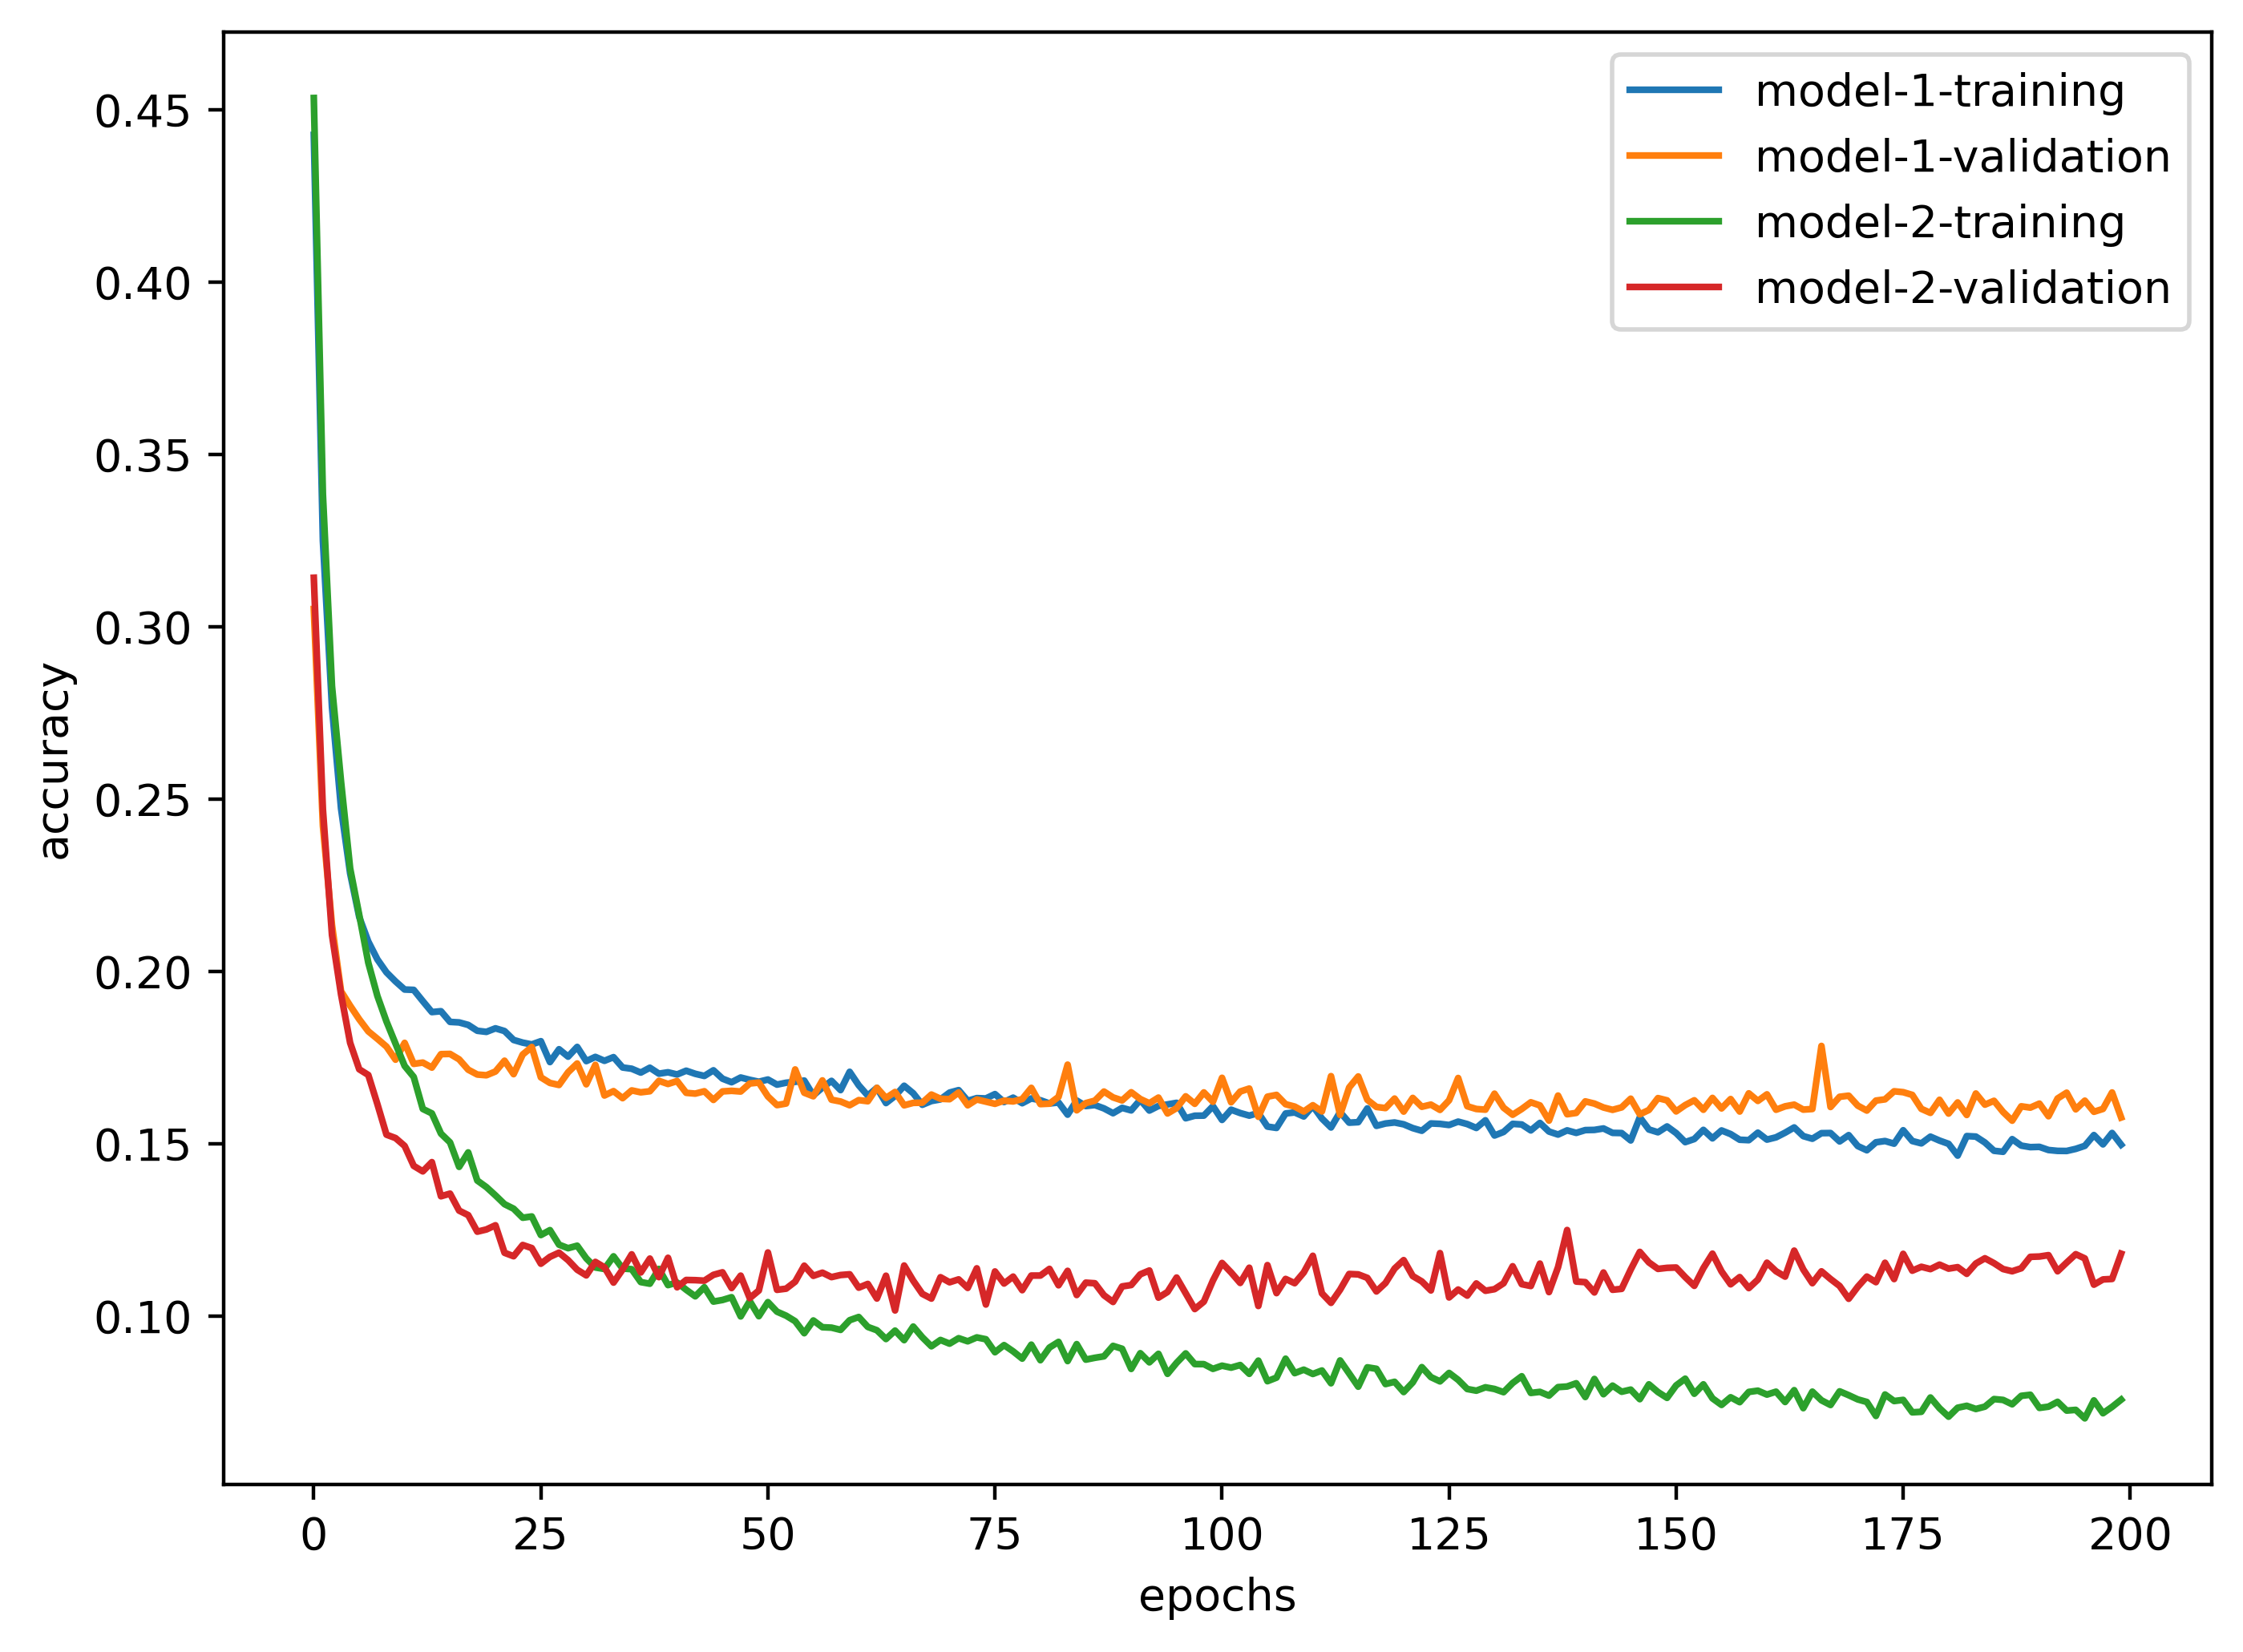

In [34]:
plt.figure(figsize=(8, 6), dpi=400)
plt.plot(history_1.history['loss'], label='model-1-training')
plt.plot(history_1.history['val_loss'], label='model-1-validation')
plt.plot(history_2.history['loss'], label='model-2-training')
plt.plot(history_2.history['val_loss'], label='model-2-validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

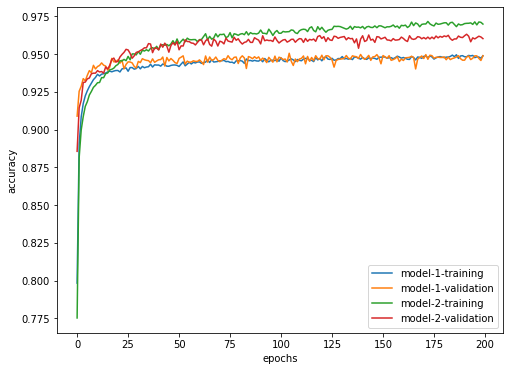

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(history_1.history['binary_accuracy'], label='model-1-training')
plt.plot(history_1.history['val_binary_accuracy'], label='model-1-validation')
plt.plot(history_2.history['binary_accuracy'], label='model-2-training')
plt.plot(history_2.history['val_binary_accuracy'], label='model-2-validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

In [36]:
model_1.load_weights(model_dir + '/Best-model-1.h5')

model_2.load_weights(model_dir + '/Best-model-2.h5')
loss_1, accuracy_1 = model_1.evaluate(x_test_normal, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test_one_hot, y_test)
print("Model-1: {}%\nModel-2: {}%".format(accuracy_1, accuracy_2))

313/313 [==============================] - 1s 2ms/step - loss: 0.1102 - binary_accuracy: 0.9629
Model-1: 0.9513000249862671%
Model-2: 0.9628999829292297%


In [37]:
venusaur = np.expand_dims(pokemon_data_one_hot[3], axis=0)
charizard = np.expand_dims(pokemon_data_one_hot[7], axis=0)
blastoise = np.expand_dims(pokemon_data_one_hot[12], axis=0)

In [38]:
# 妙蛙花 vs 噴火龍
pred = model_2.predict(np.concatenate([venusaur, charizard], axis=-1))
winner = '妙蛙花' if pred < 0 else '噴火龍'
print("pred={}, {} 獲勝".format(pred, winner))

# 噴火龍 vs 水箭龜
pred = model_2.predict(np.concatenate([charizard, blastoise], axis=-1))
winner = '噴火龍' if pred < 0 else '水箭龜'
print("pred={}, {} 獲勝".format(pred, winner))

# 水箭龜 vs 妙蛙花
pred = model_2.predict(np.concatenate([blastoise, venusaur], axis=-1))
winner = '水箭龜' if pred < 0 else '妙蛙花'
print("pred={}, {} 獲勝".format(pred, winner))

pred=[[8.102491]], 噴火龍 獲勝
pred=[[-19.974903]], 噴火龍 獲勝
pred=[[10.216342]], 妙蛙花 獲勝
